# Exploratory Data Analysis of the Hillstrom Email Marketing dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from pyuplift.datasets import load_hillstrom_email_marketing

## Visualization setups

In [3]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15, 5)})

In [4]:
data = load_hillstrom_email_marketing(download_if_missing=True, load_raw_data=True)

In [5]:
data.keys()

dict_keys(['description', 'data', 'feature_names', 'treatment', 'target', 'target_spend', 'target_visit', 'target_conversion'])

In [6]:
data['description']

'This dataset contains 64,000 customers who last purchased within twelve months. The customers were involved in an e-mail test. 1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise. 1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise. 1/3 were randomly chosen to not receive an e-mail campaign. During a period of two weeks following the e-mail campaign, results were tracked. Your job is to tell the world if the Mens or Womens e-mail campaign was successful.'

## Utils

In [7]:
def generate_feature_repr(values):
    feature_names = list(set(values))
    feature_names.sort()
    feature_values = []
    for feature_name in feature_names:
        value = values[values == feature_name].shape[0]
        feature_values.append(value)
    return pd.DataFrame(data={
        'Name': feature_names,
        'Value': feature_values
    })

# Inspect the dataset

## Data description

This dataset contains 64,000 customers who last purchased within twelve months. The customers were involved in an e-mail test.

 * 1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise.
 * 1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise.
 * 1/3 were randomly chosen to not receive an e-mail campaign.

During a period of two weeks following the e-mail campaign, results were tracked.

## Feature description
Historical customer attributes at your disposal include:
* Recency: Months since| last purchase.  
* History_Segment: Categorization of dollars spent in the past year.
* History: Actual dollar value spent in the past year.  
* Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.  
* Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.  
* Zip_Code: Classifies zip code as Urban, Suburban, or Rural.  
* Newbie: 1/0 indicator, 1 = New customer in the past twelve months.  
* Channel: Describes the channels the customer purchased from in the past year.

Another variable describes the e-mail campaign the customer received:  
* Segment (treatment) - Mens E-Mail, Womens E-Mail, No E-Mail  

Finally, we have a series of variables describing activity in the two weeks following delivery of the e-mail campaign:  
* Visit: 1/0 indicator, 1 = Customer visited website in the following two weeks.
* Conversion: 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.
* Spend: Actual dollars spent in the following two weeks.

In [8]:
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])

In [9]:
df['treatment'] = data['treatment']
df['target_spend'] = data['target_spend']
df['target_visit'] = data['target_visit']
df['target_conversion'] = data['target_conversion']

In [10]:
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target_spend,target_visit,target_conversion
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0.0,0,0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0.0,0,0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0.0,0,0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0.0,0,0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0.0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
recency              64000 non-null object
history_segment      64000 non-null object
history              64000 non-null object
mens                 64000 non-null object
womens               64000 non-null object
zip_code             64000 non-null object
newbie               64000 non-null object
channel              64000 non-null object
treatment            64000 non-null object
target_spend         64000 non-null float64
target_visit         64000 non-null int64
target_conversion    64000 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 5.9+ MB


## Inspect the treatment variable

In [12]:
df['treatment'].head()

0    Womens E-Mail
1        No E-Mail
2    Womens E-Mail
3      Mens E-Mail
4    Womens E-Mail
Name: treatment, dtype: object

### The treatment variable contains 3 type of treatment:
* **No E-Mail** - User didn't get any e-mail  
* **Mens E-Mail** - User got an e-mail featuring mens merchandise  
* **Womens E-Mail** - User got an e-mail featuring womens merchandise  

In [13]:
df_repr = generate_feature_repr(df['treatment'])

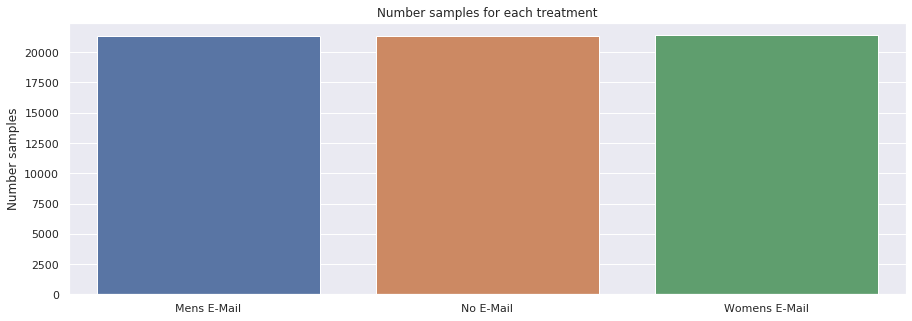

In [14]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(
    xlabel='',
    ylabel='Number samples', 
    title='Number samples for each treatment'
);

# Inspect the target variable

## Target variable - spend
Actual dollars spent in the following two weeks

In [15]:
target = df['target_spend'] 
non_zero = target[target != 0].shape[0]
print("{}% - non zero values".format(100 * non_zero / target.shape[0]))

0.903125% - non zero values


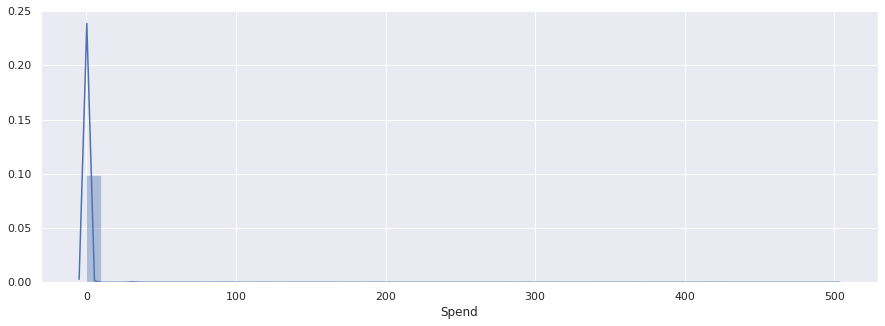

In [16]:
ax = sns.distplot(df['target_spend'])
ax.set(xlabel='Spend', ylabel='');

## Target variable - visit
1/0 indicator, 1 = Customer visited website in the following two weeks

In [17]:
df_repr = generate_feature_repr(df['target_visit'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Customer visited the website' if x else "Customer doesn't visited the website")

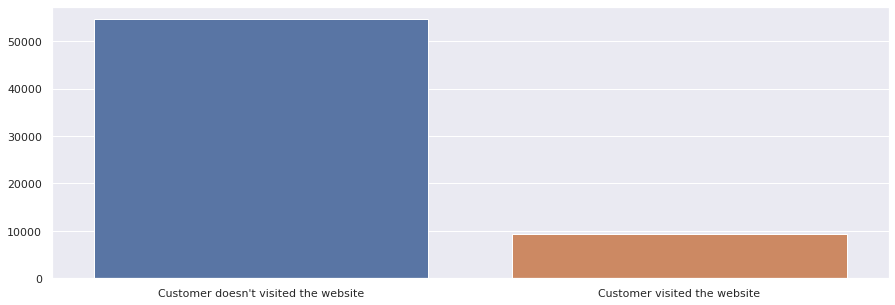

In [18]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

## Target variable - conversion:
1/0 indicator, 1 = Customer purchased merchandise in the following two weeks

In [19]:
df_repr = generate_feature_repr(df['target_conversion'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Customer purchased merchandise' if x else "Customer doesn't purchased merchandise")

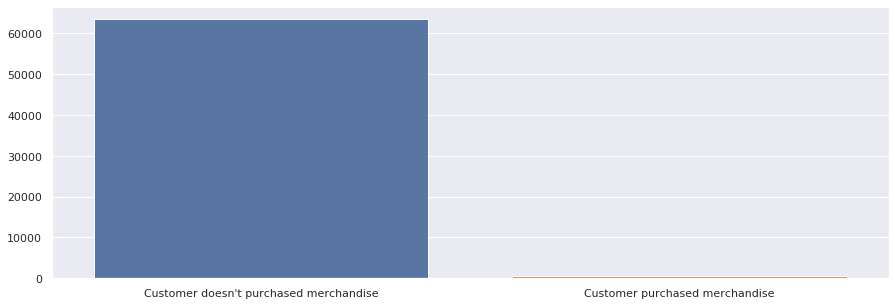

In [20]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

# Inspect features

## Feature: zip_code
Classifies zip code as Urban, Suburban, or Rural

In [21]:
df_repr = generate_feature_repr(df['zip_code'].values)

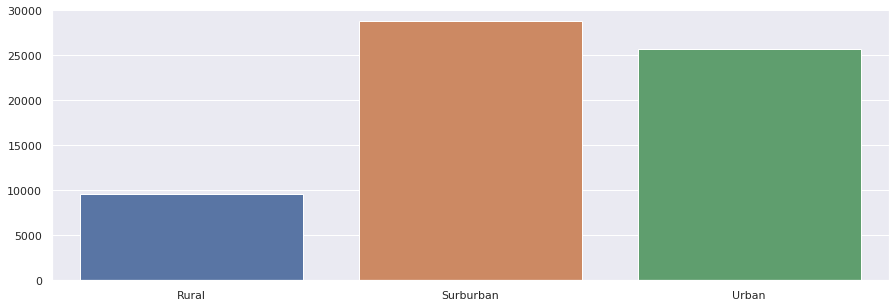

In [22]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

## Feature: channel
Describes the channels the customer purchased from in the past year

In [23]:
df_repr = generate_feature_repr(df['channel'].values)

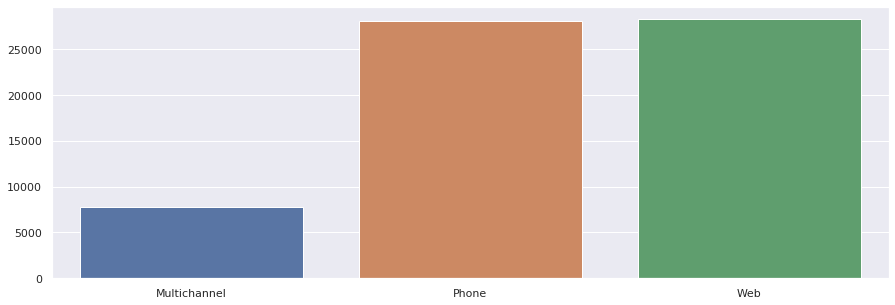

In [24]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

## Feature: recency
Months since last purchase

In [25]:
df_repr = generate_feature_repr(df['recency'].values)

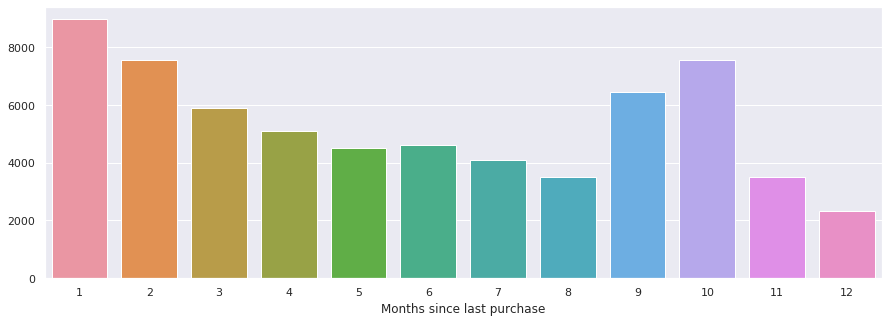

In [26]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='Months since last purchase', ylabel='');

## Feature: mens
1/0 indicator, 1 = customer purchased mens merchandise in the past year

In [27]:
df_repr = generate_feature_repr(df['mens'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Customer purchased mens merchandise' if x else "Customer doesn't purchased mens merchandise")

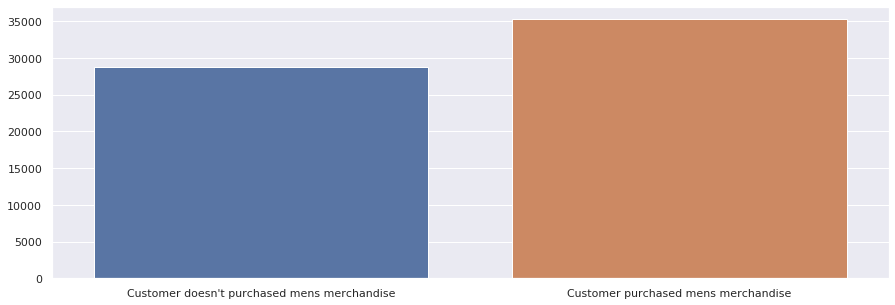

In [28]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

## Feature: womens
1/0 indicator, 1 = customer purchased womens merchandise in the past year

In [29]:
df_repr = generate_feature_repr(df['womens'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Customer purchased womens merchandise' if x else "Customer doesn't purchased womens merchandise")

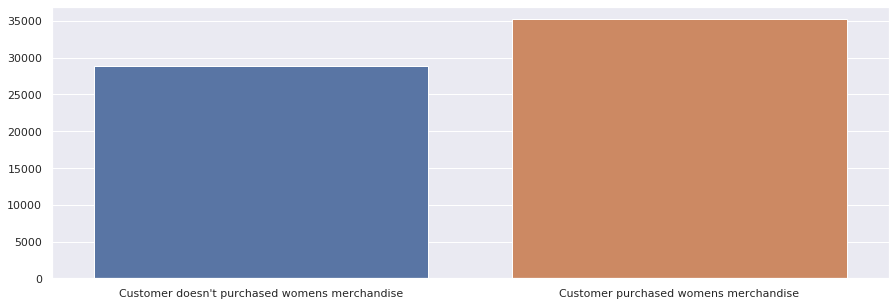

In [30]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

## Feature: newbie
1/0 indicator, 1 = New customer in the past twelve months

In [31]:
df_repr = generate_feature_repr(df['newbie'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Newbie' if x else 'Not newbie')

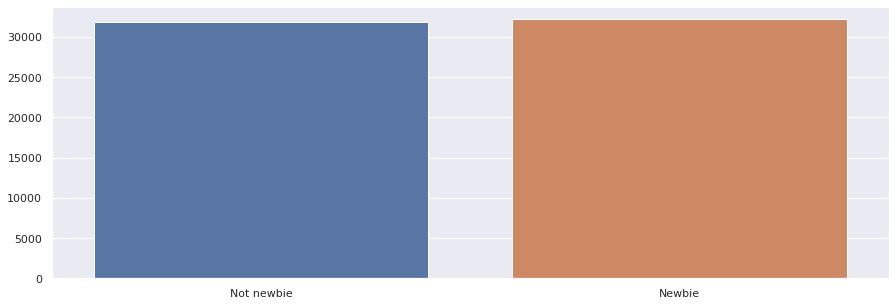

In [32]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

## Feature: history
Actual dollar value spent in the past year

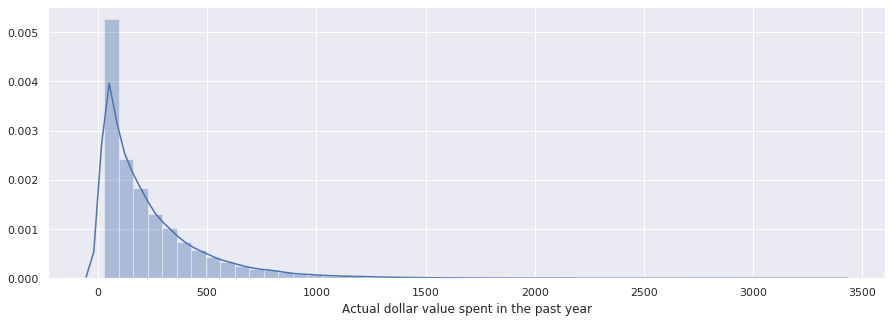

In [33]:
ax = sns.distplot(df['history'].values)
ax.set(
    xlabel='Actual dollar value spent in the past year', 
    ylabel=''
);

## Feature: history_segment
Categorization of dollars spent in the past year

In [34]:
df_repr = generate_feature_repr(df['history_segment'].values)

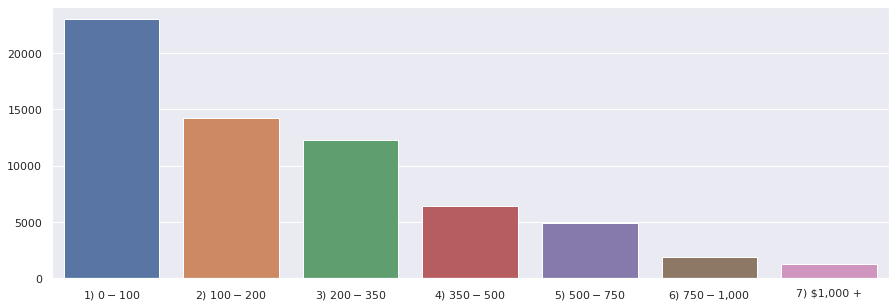

In [35]:
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');